# Satisfaction Analysis of the Telecom Dataset (Task-4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# Dispaly max column
pd.pandas.set_option('display.max_columns',None)
# Display max rows
#pd.pandas.set_option('display.max_rows', None)

### Load the Data

In [4]:
# Load engagement data

user_engagement= pd.read_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_scores.csv')
user_engagement.head()




,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN
0,7,1896688.0,4.612115e+09,2,2,9.168052e+10,3.365955e+10
1,6,518395.0,1.640307e+09,1,1,2.465947e+12,3.376373e+10
2,6,518397.0,3.727879e+09,1,1,2.465947e+12,3.366258e+10
3,6,497590.0,2.881097e+09,1,1,2.465947e+12,3.369844e+10
4,6,515573.0,3.752679e+09,1,1,2.465947e+12,3.369925e+10


In [5]:
# Load the experience data

user_experience = pd.read_csv("E:/KAIM 2/KAIM 2 Week 2/Week2/data/experience_data_with_scores.csv")
user_experience.head()

,MSISDN/Number,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score
0,3.366447e+10,221.0,34805.0,6034635.0,0,-0.155484
1,3.365875e+10,452.0,40058.0,9865591.0,0,0.249037
2,3.366274e+10,855.0,21664.0,797235.0,0,0.656889
3,3.366917e+10,115.0,62859.0,658099.0,0,-0.038183
4,3.366555e+10,80.0,29579.0,13312758.0,0,-0.410731


In [6]:
# Rename the column MSISDN?NUMBER to MSISDN

user_experience = user_experience.rename(columns={'MSISDN/Number': 'MSISDN'})
user_experience.head()           

,MSISDN,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score
0,3.366447e+10,221.0,34805.0,6034635.0,0,-0.155484
1,3.365875e+10,452.0,40058.0,9865591.0,0,0.249037
2,3.366274e+10,855.0,21664.0,797235.0,0,0.656889
3,3.366917e+10,115.0,62859.0,658099.0,0,-0.038183
4,3.366555e+10,80.0,29579.0,13312758.0,0,-0.410731


##### Task 4.2

The average of both engagement & experience scores as the satisfaction score

In [7]:
satisfaction_metrics = pd.merge(user_engagement, user_experience, on="MSISDN")
satisfaction_metrics['satisfaction_score'] = (satisfaction_metrics['engagement_score'] +
                                              satisfaction_metrics['Experience Score']) / 2

score_df = satisfaction_metrics[['MSISDN','engagement_score',
                                              'Experience Score', 'satisfaction_score']]

In [8]:
satisfaction_metrics['MSISDN'] = satisfaction_metrics['MSISDN'].astype('int')
satisfaction_metrics['MSISDN'] = satisfaction_metrics['MSISDN'].astype('category')
satisfaction_metrics

,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN,Avg RTT,Avg Bearer TP,TCP Retrans.,Experience Cluster,Experience Score,satisfaction_score
0,7,1896688.0,4.612115e+09,2,2,9.168052e+10,-2147483648,75.0,95433.0,2921029.0,2,0.233368,4.584026e+10
1,7,1896688.0,4.612115e+09,2,2,9.168052e+10,-2147483648,82.0,87162.0,456204.0,2,0.157311,4.584026e+10
2,7,1896688.0,4.612115e+09,2,2,9.168052e+10,-2147483648,64.0,159403.0,3986350.0,2,0.863806,4.584026e+10
3,7,1896688.0,4.612115e+09,2,2,9.168052e+10,-2147483648,70.0,55270.0,175503.0,0,-0.182919,4.584026e+10
4,7,1896688.0,4.612115e+09,2,2,9.168052e+10,-2147483648,67.0,142050.0,18269524.0,2,0.711073,4.584026e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,1,86400.0,7.117296e+08,0,0,6.152278e+12,-2147483648,182.0,60806.0,395891655.0,0,0.536947,3.076139e+12
17561,1,86400.0,2.209303e+08,0,0,6.152278e+12,-2147483648,51.0,200899.0,16055727.0,2,1.278214,3.076139e+12
17562,1,77702.0,8.998034e+08,0,0,6.152278e+12,-2147483648,243.0,70210.0,21018297.0,0,0.253635,3.076139e+12
17563,1,86399.0,7.579783e+08,0,0,6.152278e+12,-2147483648,189.0,60856.0,2225876.0,0,0.054632,3.076139e+12


##### Top 10 satisfied customer


##### The follwing code snippet is designed to identify and display the top 10 customers with the highest satisfaction scores from a DataFrame called satisfaction_metrics. 

In [9]:
# Assuming you already have satisfaction_metrics DataFrame
top_satisfied_customers = satisfaction_metrics.nlargest(10, 'satisfaction_score')

# Display the top 10 satisfied customers
print("Top 10 Satisfied Customers:")
print(top_satisfied_customers[['MSISDN', 'satisfaction_score']])


Top 10 Satisfied Customers:
           MSISDN  satisfaction_score
11741 -2147483648        3.076139e+12
15443 -2147483648        3.076139e+12
12864 -2147483648        3.076139e+12
6490  -2147483648        3.076139e+12
17286 -2147483648        3.076139e+12
8914  -2147483648        3.076139e+12
12258 -2147483648        3.076139e+12
3525  -2147483648        3.076139e+12
12302 -2147483648        3.076139e+12
9848  -2147483648        3.076139e+12


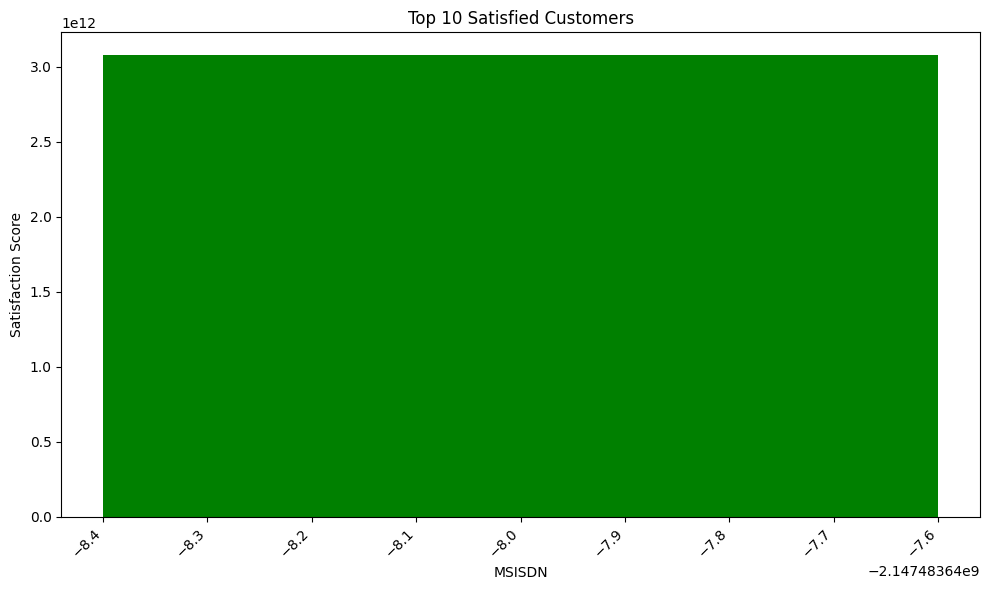

In [10]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_satisfied_customers['MSISDN'], top_satisfied_customers['satisfaction_score'], color='green')
plt.xlabel('MSISDN')
plt.ylabel('Satisfaction Score')
plt.title('Top 10 Satisfied Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Build a regression model of your choice to predict the satisfaction score of a customer. 


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = score_df[['engagement_score', 'Experience Score']]
y = score_df[['satisfaction_score']]


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)


linear_reg = LinearRegression()

x = linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X)


##### Run a k-means (k=2) on the engagement & the experience score.

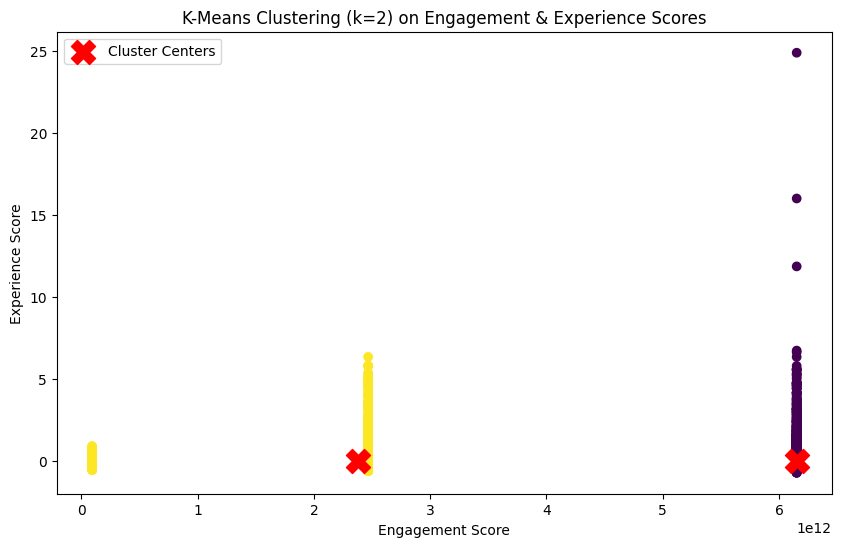

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the relevant columns for clustering
X = satisfaction_metrics[['engagement_score', 'Experience Score']]

# Run KMeans clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
satisfaction_metrics['cluster_2'] = kmeans_2.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(satisfaction_metrics['engagement_score'], satisfaction_metrics['Experience Score'], c=satisfaction_metrics['cluster_2'], cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.title('K-Means Clustering (k=2) on Engagement & Experience Scores')
plt.legend()
plt.show()

#### Aggregate the average satisfaction & experience score per cluster. 

In [13]:
# Group by the cluster and calculate the average satisfaction and experience scores
cluster_aggregate = satisfaction_metrics.groupby('cluster_2')[['satisfaction_score', 'Experience Score']].mean()

# Display the aggregated results
print("Aggregate of Average Satisfaction and Experience Scores per Cluster:")
print(cluster_aggregate)

Aggregate of Average Satisfaction and Experience Scores per Cluster:
           satisfaction_score  Experience Score
cluster_2                                      
0                3.076139e+12         -0.009527
1                1.188247e+12          0.025697


##### Conclusion of the Satisfaction Analysis of Telecom Data

The above code snippets aggregate the satisfaction and experience scores by cluster after performing K-means clustering.


a) Data Aggregation:
The codes use the groupby method to group the satisfaction_metrics DataFrame by the cluster_2 column, which contains the cluster assignments from the K-means clustering process.
It then calculates the mean values for two key metrics: satisfaction_score and Experience Score for each cluster. This aggregation helps summarize the overall performance of each customer segment.


b) Insights into Customer Segments:
The resulting cluster_aggregate DataFrame provides average scores for satisfaction and experience for each cluster. This data is crucial for understanding how different customer segments are performing in terms of their experiences and satisfaction levels.
By printing the aggregated results, stakeholders can quickly assess which clusters represent the most satisfied customers and how their experiences compare to those in other clusters.


c) Strategic Implications:
The insights gained from this aggregation can inform strategic decisions. For example, if one cluster shows significantly higher satisfaction and experience scores, businesses may want to explore the factors contributing to this success and replicate them across other segments.
Conversely, if another cluster has low scores, this could highlight areas needing improvement, prompting targeted interventions to enhance customer satisfaction and experience.


d) Data-Driven Decision Making:
This approach emphasizes the importance of data-driven decision-making. By quantifying customer experiences and satisfaction at the cluster level, organizations can tailor their services and marketing strategies to better meet the needs of different customer groups.


e) Foundation for Further Analysis:
The aggregated results can serve as a foundation for further analysis, such as correlating these scores with other metrics, identifying trends over time, or assessing the impact of specific initiatives aimed at improving customer satisfaction.
In summary, this code snippet effectively summarizes customer satisfaction and experience metrics across different clusters, providing valuable insights that can guide business strategies and enhance customer engagement.